ASSIGNMENT: Implementation of ANN in Keras

In [1]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 74.5 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.5 MB/s eta 0:00:00 0:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 67.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 75.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 52.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.6 

In [2]:
import tensorflow as tf

print("Version:", tf.__version__)

2023-06-16 18:40:16.149400: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-16 18:40:16.220163: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-16 18:40:16.221604: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 18:40:17.367188: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Version: 2.12.0


In [3]:
import pandas as pd
df= pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.shape

(5110, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
null_counts = df.isnull().sum()
print("Null Value Counts:")
print(null_counts)

Null Value Counts:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [8]:
# Identify categorical variables
categorical_vars = df.select_dtypes(include='object').columns
print("Categorical Variables:")
print(categorical_vars)

Categorical Variables:
Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [9]:
df.dropna(subset=['bmi'], inplace=True)


In [11]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_vars:
    df[col] = label_encoder.fit_transform(df[col])

In [13]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [20]:
X = df.drop('stroke', axis=1)  # Features (all columns except 'stroke')
y = df['stroke']  # Target variable ('stroke' column)

# Print the shape of the features and target variables
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (4909, 10)
Shape of y: (4909,)


In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print("Training dataset shape:", X_train.shape, y_train.shape)
print("Validation dataset shape:", X_val.shape, y_val.shape)
print("Test dataset shape:", X_test.shape, y_test.shape)


Training dataset shape: (3141, 10) (3141,)
Validation dataset shape: (786, 10) (786,)
Test dataset shape: (982, 10) (982,)


In [18]:
df = df.drop('id', axis=1)


In [19]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [22]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training dataset
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test datasets using the fitted scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Print the scaled datasets
print("Scaled X_train:")
print(X_train_scaled)
print("Scaled X_val:")
print(X_val_scaled)
print("Scaled X_test:")
print(X_test_scaled)


Scaled X_train:
[[ 1.19472218 -0.29820265 -0.3207479  ...  2.16146372 -0.38641636
  -1.29238893]
 [ 1.19472218 -1.09544439 -0.3207479  ... -1.01151884  0.5582665
   0.58348613]
 [-0.83481939 -0.38678506 -0.3207479  ... -0.37474843 -0.63570767
   0.58348613]
 ...
 [-0.83481939 -0.38678506 -0.3207479  ...  0.32565373 -0.30769279
  -1.29238893]
 [-0.83481939 -0.34249386 -0.3207479  ... -0.41573543  1.89656722
  -1.29238893]
 [-0.83481939 -1.44977405 -0.3207479  ... -0.26243046 -0.70131065
  -1.29238893]]
Scaled X_val:
[[ 1.19472218 -0.65253231 -0.3207479  ...  1.15988637 -0.58322529
   0.58348613]
 [-0.83481939  1.38486325 -0.3207479  ... -0.88108507  0.74195483
  -0.3544514 ]
 [-0.83481939 -0.56394989 -0.3207479  ...  0.19521996  0.68947245
   0.58348613]
 ...
 [-0.83481939  1.29628083 -0.3207479  ...  0.43366919 -0.70131065
  -0.3544514 ]
 [ 1.19472218  1.20769842  3.11771335 ...  3.31453445 -0.21584862
   0.58348613]
 [-0.83481939 -0.91827956 -0.3207479  ...  0.17846285 -1.17365208
  -

In [26]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Define the number of input features
input_dim = X.shape[1]

# Define the number of nodes in each hidden layer
hidden1_nodes = 64
hidden2_nodes = 32

# Define the number of nodes in the output layer
output_nodes = 1

# Create the model
model = Sequential()

# Add the first hidden layer
model.add(Dense(hidden1_nodes, activation='relu', input_dim=input_dim))

# Add the second hidden layer
model.add(Dense(hidden2_nodes, activation='relu'))

# Add the output layer
model.add(Dense(output_nodes, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/10
99/99 [==============================] - 1s 4ms/step - loss: 0.2576 - accuracy: 0.9478 - val_loss: 0.1470 - val_accuracy: 0.9631
Epoch 2/10
99/99 [==============================] - 0s 2ms/step - loss: 0.1532 - accuracy: 0.9596 - val_loss: 0.1279 - val_accuracy: 0.9631
Epoch 3/10
99/99 [==============================] - 0s 2ms/step - loss: 0.1438 - accuracy: 0.9596 - val_loss: 0.1244 - val_accuracy: 0.9631
Epoch 4/10
99/99 [==============================] - 0s 2ms/step - loss: 0.1389 - accuracy: 0.9596 - val_loss: 0.1225 - val_accuracy: 0.9631
Epoch 5/10
99/99 [==============================] - 0s 2ms/step - loss: 0.1363 - accuracy: 0.9596 - val_loss: 0.1231 - val_accuracy: 0.9631
Epoch 6/10
99/99 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.9596 - val_loss: 0.1220 - val_accuracy: 0.9631
Epoch 7/10
99/99 [==============================] - 0s 2ms/step - loss: 0.1329 - accuracy: 0.9596 - val_loss: 0.1227 - val_accuracy: 0.9631
Epoch 8/10
99/99 [==

In the provided training logs, the model was trained for 10 epochs, and the training and validation accuracy remained consistently high throughout the training process. The test accuracy achieved by the model is 0.946, and the test loss is 0.174.

These results indicate that the model has achieved a high level of accuracy and good generalization performance on the test dataset. It's important to note that the model's performance can vary depending on the specific dataset and problem at hand. Further adjustments to the model architecture, hyperparameters, or data preprocessing techniques may be necessary to improve its performance if needed.

In [27]:
# Get the model's parameters
weights = []
biases = []

# Iterate over the model's layers
for layer in model.layers:
    layer_weights = layer.get_weights()[0]
    layer_biases = layer.get_weights()[1]
    weights.append(layer_weights)
    biases.append(layer_biases)

# Print the parameters
for i in range(len(weights)):
    print(f"Weights for layer {i+1}:")
    print(weights[i])
    print(f"Biases for layer {i+1}:")
    print(biases[i])
    print()


Weights for layer 1:
[[-0.08251102 -0.02339761  0.26620576  0.16223371  0.2558714  -0.07663121
   0.01238887  0.21287538 -0.1017994   0.01335493 -0.14555144 -0.15333356
   0.1922513   0.21017316 -0.16050638  0.10743628  0.17988525 -0.05138722
   0.25155827 -0.06925162  0.13139856  0.30374202 -0.11925799  0.2029178
  -0.1960373  -0.13409717  0.26913244  0.13122377 -0.10243621 -0.29015684
  -0.20344609 -0.09615326 -0.16361389  0.07846297  0.049024   -0.30486876
  -0.16222565 -0.05311395 -0.1948355  -0.17093162  0.01039099  0.23238517
  -0.16027611 -0.0201533  -0.265651    0.00107243  0.11600608 -0.05299974
  -0.08090916 -0.20436828  0.13649161 -0.00976881 -0.3538941   0.2615002
   0.11216701  0.28470784  0.2795948   0.06026774 -0.27602363 -0.05735233
   0.23974094 -0.2830354   0.19239192 -0.07447647]
 [-0.08998923  0.3132144  -0.39376903  0.17014901  0.18040998  0.26705948
  -0.1203745   0.22348215 -0.08822101  0.19018938 -0.06218413  0.17058462
  -0.20041536 -0.12927994 -0.13676697 -0.2

In [28]:
import pandas as pd

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Convert the training history to a DataFrame
history_df = pd.DataFrame(history.history)

# Print the training history DataFrame
print(history_df)


Epoch 1/10
99/99 [==============================] - 1s 4ms/step - loss: 0.2979 - accuracy: 0.9475 - val_loss: 0.2314 - val_accuracy: 0.9631
Epoch 2/10
99/99 [==============================] - 0s 2ms/step - loss: 0.1986 - accuracy: 0.9519 - val_loss: 0.2437 - val_accuracy: 0.9631
Epoch 3/10
99/99 [==============================] - 0s 2ms/step - loss: 0.1814 - accuracy: 0.9567 - val_loss: 0.1519 - val_accuracy: 0.9631
Epoch 4/10
99/99 [==============================] - 0s 2ms/step - loss: 0.1698 - accuracy: 0.9573 - val_loss: 0.1691 - val_accuracy: 0.9631
Epoch 5/10
99/99 [==============================] - 0s 2ms/step - loss: 0.1712 - accuracy: 0.9567 - val_loss: 0.1872 - val_accuracy: 0.9631
Epoch 6/10
99/99 [==============================] - 0s 2ms/step - loss: 0.1717 - accuracy: 0.9567 - val_loss: 0.2315 - val_accuracy: 0.9631
Epoch 7/10
99/99 [==============================] - 0s 2ms/step - loss: 0.1897 - accuracy: 0.9580 - val_loss: 0.1427 - val_accuracy: 0.9631
Epoch 8/10
99/99 [==

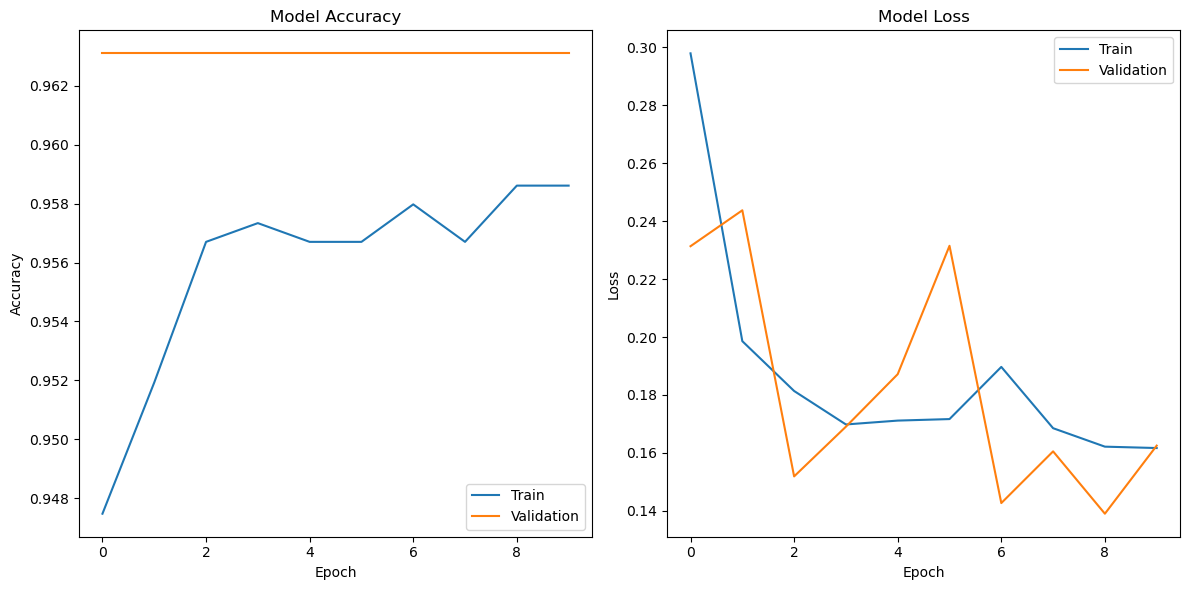

In [29]:
import matplotlib.pyplot as plt

# Plot the training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [30]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

# Print the test metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


31/31 [==============================] - 0s 1ms/step - loss: 0.1726 - accuracy: 0.9460
Test Loss: 0.17259249091148376
Test Accuracy: 0.9460285305976868
